# EDA for Game Reviews data

In [55]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [62]:
games_data_full = pl.read_parquet("../data/raw/games/steam_games.parquet")
games_data_full.columns

['appid',
 'name',
 'type',
 'required_age',
 'is_free',
 'minimum_pc_requirements',
 'recommended_pc_requirements',
 'controller_support',
 'detailed_description',
 'about_the_game',
 'short_description',
 'supported_languages',
 'header_image',
 'developers',
 'publishers',
 'price',
 'genres',
 'windows_support',
 'mac_support',
 'linux_support',
 'release_date',
 'coming_soon',
 'recommendations',
 'dlc',
 'review_score',
 'review_score_desc',
 'total_positive_reviews',
 'total_negative_reviews',
 'total_reviews',
 'categories']

In [63]:
games_data_full

appid,name,type,required_age,is_free,minimum_pc_requirements,recommended_pc_requirements,controller_support,detailed_description,about_the_game,short_description,supported_languages,header_image,developers,publishers,price,genres,windows_support,mac_support,linux_support,release_date,coming_soon,recommendations,dlc,review_score,review_score_desc,total_positive_reviews,total_negative_reviews,total_reviews,categories
i64,str,str,i64,bool,str,str,str,str,str,str,list[str],str,list[str],list[str],f64,list[str],bool,bool,bool,str,bool,i64,list[i64],i64,str,i64,i64,i64,list[str]
1974390,"""Oyster VR""","""game""",0,true,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""Oyster VR is a first-person an…","""Oyster VR is a first-person an…","""Oyster VR is a first-person an…","[""English""]","""https://shared.akamai.steamsta…","[""Sam Levine"", ""Kshitij Gajapure"", ""Paolo Villanueva""]","[""NY/NJ Baykeeper"", ""Anezka Sebek"", ""Tammy Walters""]",null,"[""Casual"", ""Simulation""]",true,true,false,"""Coming soon""",true,null,[],0,"""No reviews""",0,0,0,"[""Single-player"", ""Multi-player""]"
846250,"""Devious""","""game""",0,false,"""Minimum:OS *: Win XP+Processor…",null,null,"""<img class=""bb_img"" src=""https…","""<img class=""bb_img"" src=""https…","""A real time first person dunge…","[""English""]","""https://shared.akamai.steamsta…","[""Top Hat Curios""]","[""Nutaku Publishing""]",37.0,"[""Action"", ""Indie"", ""RPG""]",true,false,false,"""26 Jul, 2018""",false,null,[],0,"""4 user reviews""",2,2,4,"[""Single-player"", ""Family Sharing""]"
512260,"""Avalon Legends Solitaire 2""","""game""",0,false,"""Minimum:OS *: Windows Vista, 7…",null,null,"""<strong>Harness the magic of t…","""<strong>Harness the magic of t…","""Harness the power of the cards…","[""English"", ""French"", … ""Portuguese - Brazil""]","""https://shared.akamai.steamsta…","[""Anawiki Games""]","[""Anawiki Games""]",22.0,"[""Casual"", ""Indie""]",true,true,false,"""4 Oct, 2016""",false,null,[],7,"""Positive""",36,5,41,"[""Single-player"", ""Steam Achievements"", … ""Family Sharing""]"
621780,"""Virtually Impossible""","""game""",0,false,"""Minimum:OS *: Windows 7 SP1, W…","""Recommended:OS *: Windows 7 SP…",null,"""The Impossible VR Party Game. …","""The Impossible VR Party Game. …","""The Impossible VR Party Game. …","[""English""]","""https://shared.akamai.steamsta…","[""Growl Interactive""]","[""Growl Interactive""]",27.95,"[""Action"", ""Adventure"", … ""Simulation""]",true,false,false,"""13 Apr, 2017""",false,null,[],5,"""Mixed""",5,7,12,"[""Single-player"", ""Multi-player"", … ""Family Sharing""]"
2795080,"""Call of Duty Endowment (C.O.D.…","""dlc""",18,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …","""full""","""Support U.S. and U.K. military…","""Support U.S. and U.K. military…","""Support U.S. and U.K. military…","[""English"", ""French"", … ""Thai""]","""https://shared.akamai.steamsta…","[""Sledgehammer Games"", ""Treyarch"", … ""Demonware""]","[""Activision""]",73.0,"[""Action""]",true,false,false,"""6 May, 2024""",false,null,[],6,"""Mostly Positive""",12,5,17,"[""Single-player"", ""Multi-player"", … ""In-App Purchases""]"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
3440950,"""Chronos Phantasia""","""game""",0,false,"""Minimum:OS: Windows 10 64-bitP…","""Recommended:OS: Windows 10/11 …","""full""","""<p class=""bb_paragraph"">In my …","""<p class=""bb_paragraph"">In my …","""Chronos Phantasia revolutioniz…","[""English"", ""French"", … ""Zulu""]","""https://shared.akamai.steamsta…","[""RadicalDreams.Art""]","[""RadicalDreams.Art""]",null,"[""Action"", ""Adventure"", ""RPG""]",true,false,false,"""2027""",true,null,[],0,"""No reviews""",0,0,0,"[""Single-player"", ""Steam Achievements"", … ""Family Sharing""]"
2531520,"""Dreamcore Demo""","""demo""",0,true,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …","""full""","""<p class=""bb_paragraph""><img c…","""<p 

In [4]:
games_data_full = games_data_full.filter(pl.col("type") == "game")
games_data_full.shape

(101291, 30)

In [5]:
reviews = pl.read_parquet("../data/raw/reviews/steam_reviews_*.parquet")
reviews.columns

['rec_id',
 'author_id',
 'appid',
 'playtime_forever',
 'playtime_last_two_weeks',
 'playtime_at_review',
 'num_games_owned',
 'num_reviews',
 'last_played',
 'language',
 'review',
 'timestamp_created',
 'timestamp_updated',
 'voted_up',
 'votes_up',
 'votes_funny',
 'weighted_vote_score',
 'comment_count',
 'steam_purchase',
 'received_for_free',
 'written_during_early_access',
 'primarily_steam_deck']

In [6]:
reviews_by_game = reviews.group_by("appid").agg([
    pl.col("playtime_forever").sum().alias("total_playtime"),
    pl.col("voted_up").sum().alias("total_positive_reviews"),
    (~pl.col("voted_up")).sum().alias("total_negative_reviews"),
    pl.col("voted_up").mean().alias("votes_ratio"),
    ((pl.col("weighted_vote_score") * pl.col("voted_up")).sum() / pl.col("weighted_vote_score").sum()).alias(
        "weighted_votes"),
    pl.col("timestamp_created").max().alias("last_review"),
    pl.col("rec_id").count().alias("total_reviews"),
    pl.col("steam_purchase").sum().alias("steam_purchases"),
    pl.col("received_for_free").sum().alias("free_purchases"),
    pl.col("written_during_early_access").sum().alias("early_access_reviews")
])

In [7]:
reviews_by_game

appid,total_playtime,total_positive_reviews,total_negative_reviews,votes_ratio,weighted_votes,last_review,total_reviews,steam_purchases,free_purchases,early_access_reviews
i64,i64,u32,u32,f64,f64,i64,u32,u32,u32,u32
862130,7977,34,0,1.0,1.0,1749453483,34,34,0,0
443330,27022,44,20,0.6875,0.684201,1710591563,64,64,1,0
2244630,22896,44,7,0.862745,0.856793,1741306610,51,51,1,0
2727650,262297,297,57,0.838983,0.841985,1748558613,354,354,3,0
643880,212167,324,29,0.917847,0.922631,1749301386,353,353,2,0
…,…,…,…,…,…,…,…,…,…,…
1508460,321134,453,7,0.984783,0.987297,1748515796,460,460,1,0
797880,0,2,0,1.0,1.0,1713640968,2,2,0,0
3101350,50,1,0,1.0,1.0,1740195606,1,1,0,0


In [8]:
reviews_by_game_name = reviews_by_game.join(games_data_full, on="appid").select(
    "appid",
    "name",
    pl.all().exclude(["appid", "name"])
)
reviews_by_game_name

appid,name,total_playtime,total_positive_reviews,total_negative_reviews,votes_ratio,weighted_votes,last_review,total_reviews,steam_purchases,free_purchases,early_access_reviews,type,required_age,is_free,minimum_pc_requirements,recommended_pc_requirements,controller_support,detailed_description,about_the_game,short_description,supported_languages,header_image,developers,publishers,price,category_ids,genres_list,windows_support,mac_support,linux_support,release_date,coming_soon,recommendations,dlc,review_score,review_score_desc,total_positive_reviews_right,total_negative_reviews_right,total_reviews_right
i64,str,i64,u32,u32,f64,f64,i64,u32,u32,u32,u32,str,i64,bool,str,str,str,str,str,str,list[str],str,list[str],list[str],f64,list[i64],list[str],bool,bool,bool,str,bool,i64,list[i64],i64,str,i64,i64,i64
2852260,"""Pandarunium""",126,2,0,1.0,1.0,1742257432,2,2,0,0,"""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<strong>Pandarunium</strong> i…","""<strong>Pandarunium</strong> i…","""Team up with friends in this t…","[""English""]","""https://shared.akamai.steamsta…","[""Tenax Studios""]","[""Tenax Studios""]",3.99,"[2, 1, … 62]","[""Casual"", ""Indie""]",true,false,false,"""20 Jun, 2024""",false,null,[],0,"""2 user reviews""",2,0,2
291550,"""Brawlhalla""",26129902,1306,266,0.830789,0.833423,1749353719,1572,1572,41,1135,"""game""",0,true,"""Minimum:Memory: 2 GB RAMStorag…","""Recommended:Memory: 4 GB RAMNe…",null,"""<img class=""bb_img"" src=""https…","""<img class=""bb_img"" src=""https…","""An epic platform fighter for u…","[""English"", ""French"", … ""Turkish""]","""https://shared.akamai.steamsta…","[""Blue Mammoth Games""]","[""Ubisoft""]",null,"[2, 1, … 44]","[""Action"", ""Indie"", ""Free To Play""]",true,true,false,"""17 Oct, 2017""",false,2890,"[298641, 2974360, … 3392630]",8,"""Very Positive""",1306,266,1572
2116250,"""Draft Day Sports: College Foot…",27971,9,6,0.6,0.62863,1710050577,15,15,0,0,"""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""Prepare to lead your favorite …","""Prepare to lead your favorite …","""Draft Day Sports: College Foot…","[""English""]","""https://shared.akamai.steamsta…","[""Wolverine Studios""]","[""Wolverine Studios""]",53.0,"[2, 62]","[""Indie"", ""Simulation"", … ""Strategy""]",true,false,false,"""31 Aug, 2022""",false,null,[],5,"""Mixed""",9,6,15
946610,"""Pocket Rogues""",289184,95,21,0.818966,0.826438,1748653606,116,116,0,116,"""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …","""full""","""<p class=""bb_paragraph""><stron…","""<p class=""bb_paragraph""><stron…","""Pocket Rogues is a dynamic 2D-…","[""English"", ""Russian"", … ""Portuguese - Brazil""]","""https://shared.akamai.steamsta…","[""EtherGaming""]","[""EtherGaming""]",23.0,"[2, 1, … 62]","[""Action"", ""Adventure"", … ""Early Access""]",true,false,false,"""25 Oct, 2018""",false,453,[],8,"""Very Positive""",95,21,116
390730,"""Sora""",229602,144,15,0.90566,0.918082,1744504281,159,159,1,0,"""game""",0,false,"""Minimum:OS *: Windows 7/8/10/1…",null,"""full""","""<h1>Special Offer</h1><p><img …","""Sora tells the story of its na…","""From Orange Juice comes a shoo…","[""English"", ""Japanese"", … ""Spanish - Latin America""]","""https://shared.akamai.steamsta…","[""Orange_Juice""]","[""Fruitbat Factory""]",21.0,"[2, 22, … 62]","[""Action"", ""Indie""]",true,false,false,"""5 Jan, 2016""",false,356,"[411400, 411401]",8,"""Very Positive""",144,15,159
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
474910,"""The Mahjong Huntress""",44234,26,21,0.553191,0.541303,1734265659,47,47,0,0,"""game""",0,false,"""Minimum:OS *: Windows 7Process…",null,null,"""Mary Elisabeth Riley is to be …","""Mary Elisabeth Riley is to be …","""Embark on a mysterious quest i…","[""English""]","""https://shared.akamai.steamsta…","[""Nawia Games""]","[""Forever Entertainment S. A.""]",14.95,"[2, 22, 

In [9]:
reviews_by_game_name.filter(pl.col("total_playtime") == 0)

appid,name,total_playtime,total_positive_reviews,total_negative_reviews,votes_ratio,weighted_votes,last_review,total_reviews,steam_purchases,free_purchases,early_access_reviews,type,required_age,is_free,minimum_pc_requirements,recommended_pc_requirements,controller_support,detailed_description,about_the_game,short_description,supported_languages,header_image,developers,publishers,price,category_ids,genres_list,windows_support,mac_support,linux_support,release_date,coming_soon,recommendations,dlc,review_score,review_score_desc,total_positive_reviews_right,total_negative_reviews_right,total_reviews_right
i64,str,i64,u32,u32,f64,f64,i64,u32,u32,u32,u32,str,i64,bool,str,str,str,str,str,str,list[str],str,list[str],list[str],f64,list[i64],list[str],bool,bool,bool,str,bool,i64,list[i64],i64,str,i64,i64,i64
488824,"""Tom Clancy's Rainbow Six® Sieg…",0,1,1,0.5,0.525155,1468210849,2,2,0,0,"""game""",17,false,"""Minimum:OS: Windows 10, Window…","""Recommended:OS: Windows 10, Wi…","""full""","""<h1>Edition Comparison</h1><p>…","""“One of the best first-person …","""Tom Clancy's Rainbow Six® Sieg…","[""English"", ""French"", … ""Thai""]","""https://shared.akamai.steamsta…","[""Ubisoft Montreal""]","[""Ubisoft""]",74.99,"[2, 1, … 42]","[""Action""]",true,false,false,"""1 Dec, 2015""",false,1187468,"[377560, 417461, … 455572]",0,"""2 user reviews""",1,1,2
365820,"""Company of Heroes 2 - The Brit…",0,73,28,0.722772,0.732082,1748647483,101,101,6,0,"""game""",17,false,"""Minimum:Memory: 2GB RAM Proces…","""Recommended:Memory: 4GB RAMPro…",null,"""Company of Heroes 2: The Briti…","""Company of Heroes 2: The Briti…","""This latest multiplayer standa…","[""Czech"", ""English"", … ""Spanish - Spain""]","""https://shared.akamai.steamsta…","[""Relic Entertainment"", ""Feral Interactive (Mac)"", ""Feral Interactive (Linux)""]","[""SEGA"", ""Feral Interactive (Mac)"", ""Feral Interactive (Linux)""]",29.95,"[1, 22, … 62]","[""Strategy""]",true,true,true,"""2 Sep, 2015""",false,219,"[260292, 260293, 260291]",6,"""Mostly Positive""",73,28,101
1098291,"""DOOM Eternal Year One Pass""",0,123,20,0.86014,0.880024,1747416082,143,143,5,0,"""game""",0,false,"""Minimum:OS *: 64-bit Windows 7…","""Recommended:OS: 64-bit Windows…",null,"""You pulled humanity back from …","""You pulled humanity back from …","""You pulled humanity back from …","[""English"", ""French"", … ""Traditional Chinese""]","""https://shared.akamai.steamsta…","[""id Software""]","[""Bethesda Softworks""]",89.0,"[2, 1, … 62]","[""Action""]",true,false,false,"""20 Oct, 2020""",false,221,[],8,"""Very Positive""",123,20,143
488823,"""Tom Clancy's Rainbow Six® Sieg…",0,1,0,1.0,1.0,1468143132,1,1,0,0,"""game""",17,false,"""Minimum:OS: Windows 10, Window…","""Recommended:OS: Windows 10, Wi…","""full""","""<h1>Edition Comparison</h1><p>…","""“One of the best first-person …","""Tom Clancy's Rainbow Six® Sieg…","[""English"", ""French"", … ""Thai""]","""https://shared.akamai.steamsta…","[""Ubisoft Montreal""]","[""Ubisoft""]",74.99,"[2, 1, … 42]","[""Action""]",true,false,false,"""1 Dec, 2015""",false,1187694,"[377560, 417461, … 455572]",0,"""1 user reviews""",1,0,1
277751,"""The Count of Monster Disco""",0,6,0,1.0,1.0,1635542593,6,6,0,0,"""game""",0,false,"""Minimum:OS *:Windows® Vista / …","""Recommended:Graphics:Laptop ve…","""full""","""PLEASE NOTE: Train Simulator i…","""PLEASE NOTE: Train Simulator i…","""PLEASE NOTE: Train Simulator i…","[""English""]","""https://shared.akamai.steamsta…","[""Skyhook Games"", ""Dovetail Games""]","[""Dovetail Games - Trains""]",27.95,"[2, 22, … 62]","[""Simulation""]",true,false,false,"""24 Oct, 2014""",false,null,[],0,"""6 user reviews""",6,0,6
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1400970,"""The Elder Scrolls Online - Bla…",0,121,137,0.468992,0.446177,1741166286,258,258,1,0,"""game""",17,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<h1>WHICH EDITION IS RIGHT FOR…","""<h2 class=""bb

In [10]:
review_score_games = reviews_by_game_name.select(
    "appid",
    "name",
    "votes_ratio",
    "weighted_votes",
    "review_score",
    "review_score_desc",
    "total_reviews",
    "total_negative_reviews",
    "total_positive_reviews",
    "total_reviews_right",
    "total_negative_reviews_right",
    "total_positive_reviews_right"
)
review_score_games

appid,name,votes_ratio,weighted_votes,review_score,review_score_desc,total_reviews,total_negative_reviews,total_positive_reviews,total_reviews_right,total_negative_reviews_right,total_positive_reviews_right
i64,str,f64,f64,i64,str,u32,u32,u32,i64,i64,i64
2852260,"""Pandarunium""",1.0,1.0,0,"""2 user reviews""",2,0,2,2,0,2
291550,"""Brawlhalla""",0.830789,0.833423,8,"""Very Positive""",1572,266,1306,1572,266,1306
2116250,"""Draft Day Sports: College Foot…",0.6,0.62863,5,"""Mixed""",15,6,9,15,6,9
946610,"""Pocket Rogues""",0.818966,0.826438,8,"""Very Positive""",116,21,95,116,21,95
390730,"""Sora""",0.90566,0.918082,8,"""Very Positive""",159,15,144,159,15,144
…,…,…,…,…,…,…,…,…,…,…,…
474910,"""The Mahjong Huntress""",0.553191,0.541303,5,"""Mixed""",47,21,26,47,21,26
2576250,"""WyrmBound""",0.769231,0.751844,6,"""Mostly Positive""",13,3,10,13,3,10
3535330,"""Terraspace""",0.0,0.0,0,"""1 user reviews""",1,1,0,1,1,0


<Axes: xlabel='review_score', ylabel='Count'>

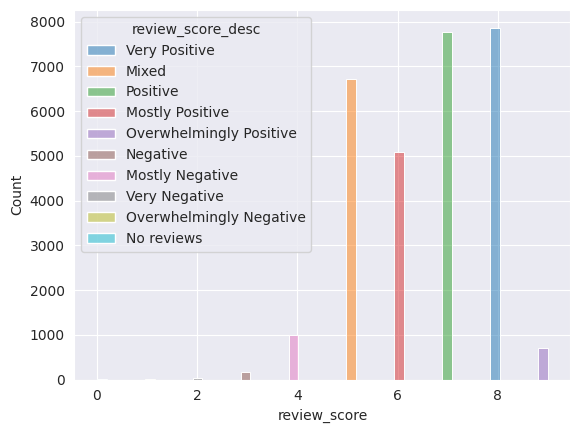

In [11]:
sns.histplot(data=review_score_games.filter(~pl.col("review_score_desc").str.contains("user reviews")),
             x="review_score", hue="review_score_desc")

<Axes: xlabel='votes_ratio', ylabel='weighted_votes'>

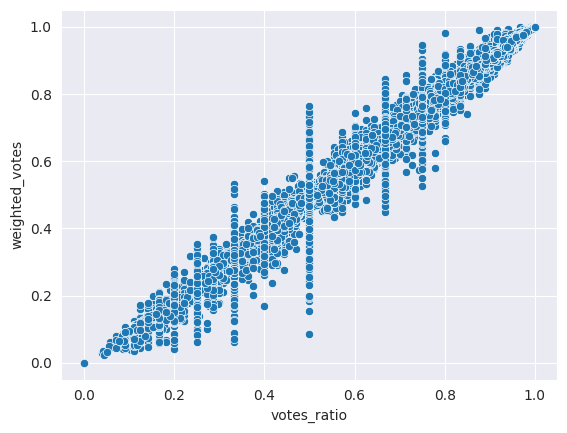

In [12]:
sns.scatterplot(data=review_score_games, x="votes_ratio", y="weighted_votes")

<Axes: xlabel='review_score', ylabel='weighted_votes'>

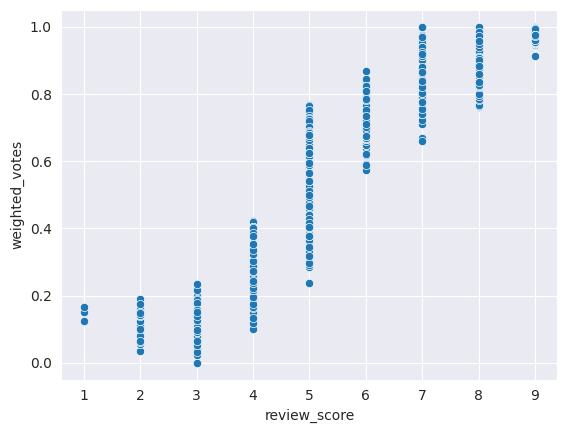

In [13]:
sns.scatterplot(data=review_score_games.filter(~pl.col("review_score_desc").str.contains("reviews")), x="review_score",
                y="weighted_votes")  # Score 0 means not enough reviews (from None to 10)

In [14]:
review_score_games.filter(
    (~pl.col("review_score_desc").str.contains("user reviews")) & (pl.col("review_score") == 4)).sort(
    "review_score_desc", descending=True)

appid,name,votes_ratio,weighted_votes,review_score,review_score_desc,total_reviews,total_negative_reviews,total_positive_reviews,total_reviews_right,total_negative_reviews_right,total_positive_reviews_right
i64,str,f64,f64,i64,str,u32,u32,u32,i64,i64,i64
256010,"""Jagged Alliance Flashback""",0.347619,0.336043,4,"""Mostly Negative""",210,137,73,210,137,73
321030,"""ONE DAY for Ched""",0.3,0.270244,4,"""Mostly Negative""",30,21,9,30,21,9
2559290,"""Gold Rush Clicker""",0.3125,0.307156,4,"""Mostly Negative""",16,11,5,16,11,5
683220,"""Business-hooiznes""",0.352941,0.276989,4,"""Mostly Negative""",17,11,6,17,11,6
666250,"""Equalizer""",0.368421,0.362898,4,"""Mostly Negative""",19,12,7,19,12,7
…,…,…,…,…,…,…,…,…,…,…,…
745370,"""Purple Heart""",0.269231,0.237911,4,"""Mostly Negative""",26,19,7,26,19,7
316750,"""Tetris® Ultimate""",0.274112,0.24242,4,"""Mostly Negative""",197,143,54,197,143,54
839260,"""Russian AYE Horror""",0.387097,0.385716,4,"""Mostly Negative""",31,19,12,31,19,12


In [15]:
review_score_games["review_score_desc"].value_counts()

review_score_desc,count
str,u32
"""Very Positive""",7867
"""6 user reviews""",1852
"""Mostly Positive""",5090
"""7 user reviews""",1566
"""Overwhelmingly Positive""",704
…,…
"""2 user reviews""",5032
"""Overwhelmingly Negative""",4
"""3 user reviews""",3567


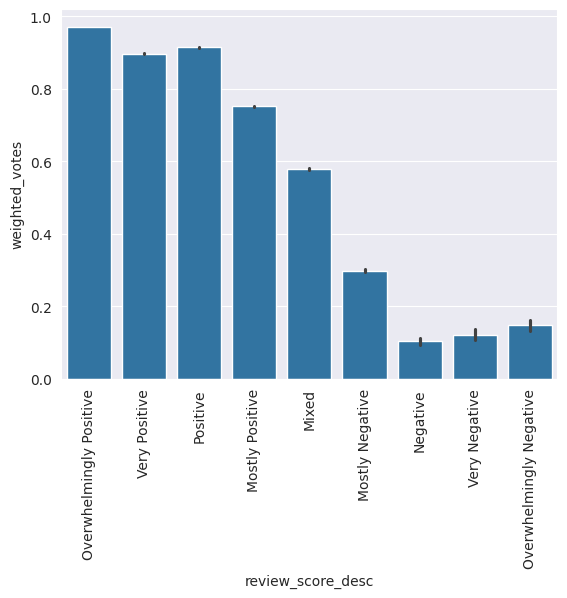

In [16]:
sns.barplot(data=review_score_games, x="review_score_desc", y="weighted_votes",
            order=["Overwhelmingly Positive", "Very Positive", "Positive", "Mostly Positive", "Mixed",
                   "Mostly Negative", "Negative", "Very Negative", "Overwhelmingly Negative"])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='total_reviews', ylabel='total_reviews_right'>

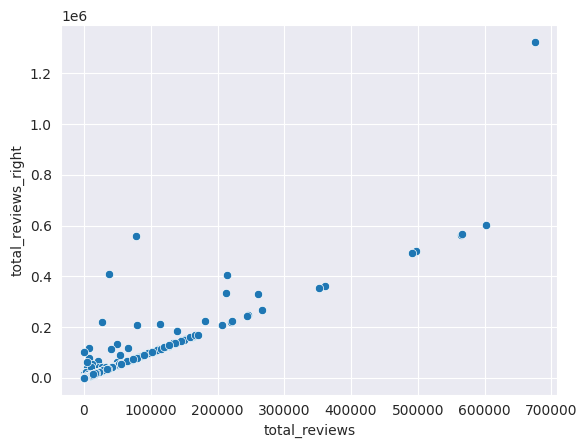

In [17]:
sns.scatterplot(data=review_score_games, x="total_reviews", y="total_reviews_right")

<Axes: xlabel='total_positive_reviews', ylabel='total_positive_reviews_right'>

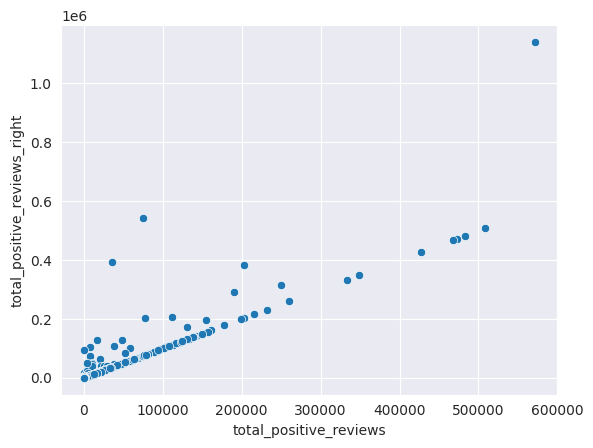

In [18]:
sns.scatterplot(data=review_score_games, x="total_positive_reviews", y="total_positive_reviews_right")

<Axes: xlabel='total_negative_reviews', ylabel='total_negative_reviews_right'>

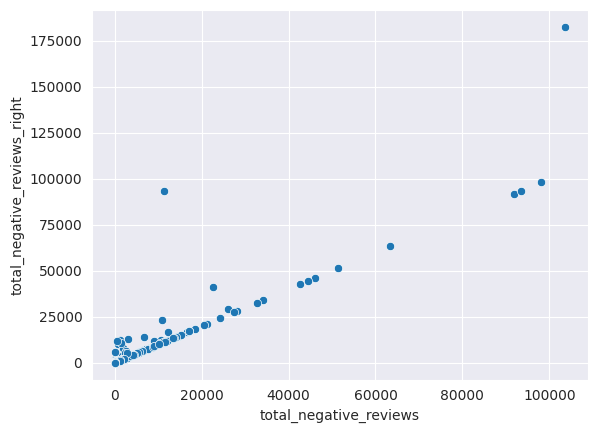

In [19]:
sns.scatterplot(data=review_score_games, x="total_negative_reviews", y="total_negative_reviews_right")

In [20]:
review_score_games.filter(pl.col("total_reviews") != pl.col("total_reviews_right")).sort(by="total_reviews_right",
                                                                                         descending=True)

appid,name,votes_ratio,weighted_votes,review_score,review_score_desc,total_reviews,total_negative_reviews,total_positive_reviews,total_reviews_right,total_negative_reviews_right,total_positive_reviews_right
i64,str,f64,f64,i64,str,u32,u32,u32,i64,i64,i64
730,"""Counter-Strike 2""",0.846421,0.846314,8,"""Very Positive""",675283,103709,571574,1324019,182665,1141354
359550,"""Tom Clancy's Rainbow Six® Sieg…",0.844784,0.845318,8,"""Very Positive""",601633,93383,508250,601539,93393,508146
553850,"""HELLDIVERS™ 2""",0.826544,0.826935,8,"""Very Positive""",565868,98153,467715,565822,98072,467750
271590,"""Grand Theft Auto V Legacy""",0.83711,0.836321,8,"""Very Positive""",564527,91956,472571,564597,91976,472621
105600,"""Terraria""",0.960879,0.962903,9,"""Overwhelmingly Positive""",78398,3067,75331,557111,12687,544424
…,…,…,…,…,…,…,…,…,…,…,…
20900,"""The Witcher: Enhanced Edition …",0.865,0.871705,0,"""No reviews""",200,27,173,0,0,0
3665110,"""Hentai Furry Unicorny""",1.0,1.0,0,"""No reviews""",1,0,1,0,0,0
2075540,"""Valete vos viatores""",1.0,1.0,0,"""No reviews""",1,0,1,0,0,0


### Check for correlations

In [21]:
corr_review_games = reviews_by_game_name.select(
    "total_positive_reviews",
    "total_negative_reviews",
    "total_reviews",
    "review_score",
    "is_free"
)

In [22]:
corr = corr_review_games.corr()

In [23]:
corr

total_positive_reviews,total_negative_reviews,total_reviews,review_score,is_free
f64,f64,f64,f64,f64
1.0,0.797712,0.996794,0.101317,-0.003929
0.797712,1.0,0.843404,0.073879,0.003679
0.996794,0.843404,1.0,0.100071,-0.003013
0.101317,0.073879,0.100071,1.0,-0.063066
-0.003929,0.003679,-0.003013,-0.063066,1.0


<Axes: >

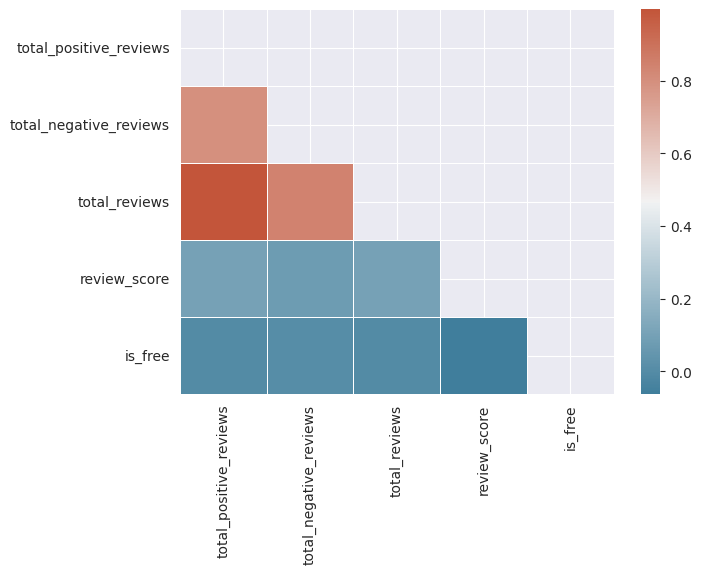

In [24]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(7, 5))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,
            linewidths=.5, xticklabels=corr.columns, yticklabels=corr.columns)

<Axes: xlabel='review_score', ylabel='total_reviews'>

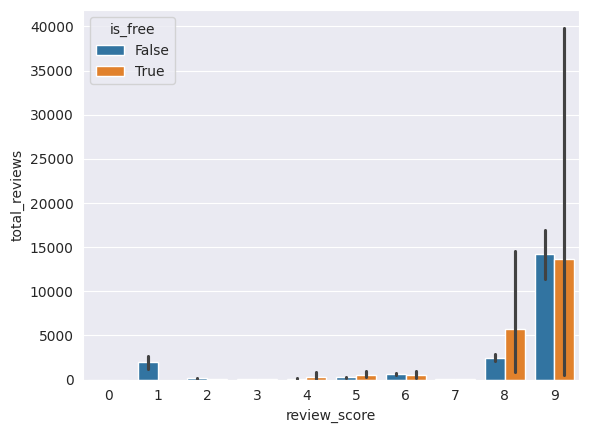

In [25]:
sns.barplot(data=corr_review_games, x="review_score", y="total_reviews", hue="is_free")

### Games received for free analysis

In [26]:
reviews_by_game_name.select("steam_purchases", "free_purchases", "total_reviews")

steam_purchases,free_purchases,total_reviews
u32,u32,u32
2,0,2
1572,41,1572
15,0,15
116,0,116
159,1,159
…,…,…
47,0,47
13,0,13
1,0,1


In [27]:
votes_received_for_free = reviews.group_by(["voted_up", "received_for_free"]).agg(pl.len().alias("count"))

In [28]:
totals = votes_received_for_free.group_by("received_for_free").agg(pl.col("count").sum().alias("total"))
totals

received_for_free,total
bool,u32
false,35795369
true,557663


In [29]:
scaled_votes = votes_received_for_free.join(
    totals,
    on="received_for_free",
).with_columns(
    (pl.col("count").cast(pl.Float64) / pl.col("total") * 100.0)
    .alias("percentage")
).select("voted_up", "received_for_free", "percentage")

In [30]:
scaled_votes

voted_up,received_for_free,percentage
bool,bool,f64
false,false,12.485456
true,false,87.514544
true,true,91.778547
false,true,8.221453


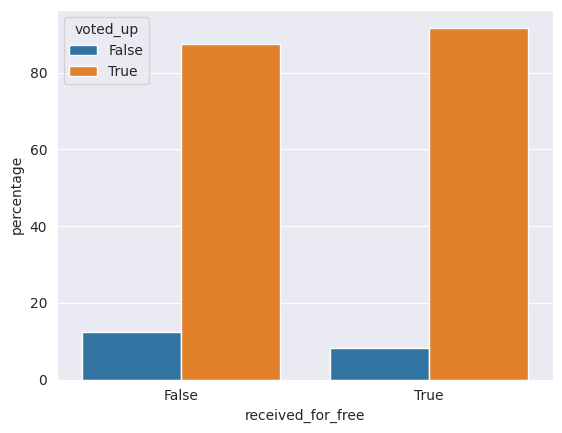

In [31]:
sns.barplot(scaled_votes, x="received_for_free", y="percentage", hue="voted_up")
plt.show()  # not much difference

### Trending of games popularities over time

In [32]:
# Sample 100 popular games
popular_games = reviews_by_game_name.filter(
    pl.col("total_positive_reviews_right") > pl.col("total_positive_reviews_right").quantile(0.98)).sample(100,
                                                                                                           seed=42).sort(
    "total_positive_reviews", descending=True)
popular_games

appid,name,total_playtime,total_positive_reviews,total_negative_reviews,votes_ratio,weighted_votes,last_review,total_reviews,steam_purchases,free_purchases,early_access_reviews,type,required_age,is_free,minimum_pc_requirements,recommended_pc_requirements,controller_support,detailed_description,about_the_game,short_description,supported_languages,header_image,developers,publishers,price,category_ids,genres_list,windows_support,mac_support,linux_support,release_date,coming_soon,recommendations,dlc,review_score,review_score_desc,total_positive_reviews_right,total_negative_reviews_right,total_reviews_right
i64,str,i64,u32,u32,f64,f64,i64,u32,u32,u32,u32,str,i64,bool,str,str,str,str,str,str,list[str],str,list[str],list[str],f64,list[i64],list[str],bool,bool,bool,str,bool,i64,list[i64],i64,str,i64,i64,i64
4000,"""Garry's Mod""",19668984734,483022,14816,0.970239,0.971459,1749479452,497838,497838,17315,0,"""game""",0,false,"""Minimum:OS: Windows® 10Process…","""Recommended:OS: Windows® 10/11…",null,"""Garry's Mod is a physics sandb…","""Garry's Mod is a physics sandb…","""Garry's Mod is a physics sandb…","[""English"", ""French"", … ""Ukrainian""]","""https://shared.akamai.steamsta…","[""Facepunch Studios""]","[""Valve""]",27.95,"[2, 1, … 62]","[""Casual"", ""Indie"", ""Simulation""]",true,true,true,"""29 Nov, 2006""",false,996317,[],9,"""Overwhelmingly Positive""",483071,14819,497890
294100,"""RimWorld""",5604667881,103209,2068,0.980357,0.983458,1749377540,105277,105277,506,10300,"""game""",0,false,"""Minimum:OS *: Windows 7Process…",null,null,"""<strong>RimWorld is a sci-fi c…","""<strong>RimWorld is a sci-fi c…","""A sci-fi colony sim driven by …","[""English"", ""French"", … ""Spanish - Latin America""]","""https://shared.akamai.steamsta…","[""Ludeon Studios""]","[""Ludeon Studios""]",67.0,"[2, 30, … 62]","[""Indie"", ""Simulation"", ""Strategy""]",true,true,true,"""17 Oct, 2018""",false,177708,"[2380740, 1826140, … 1244270]",9,"""Overwhelmingly Positive""",103242,2069,105311
435150,"""Divinity: Original Sin 2 - Def…",955226465,74709,3598,0.954053,0.961386,1749567097,78307,78307,284,1433,"""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …","""full""","""<h1>Digital Collector's Editio…","""<img class=""bb_img"" src=""https…","""The critically acclaimed RPG t…","[""English"", ""French"", … ""Japanese""]","""https://shared.akamai.steamsta…","[""Larian Studios""]","[""Larian Studios""]",111.95,"[2, 1, … 62]","[""Adventure"", ""RPG"", ""Strategy""]",true,true,false,"""14 Sep, 2017""",false,165996,"[715950, 880640, 1247270]",9,"""Overwhelmingly Positive""",74723,3599,78322
400,"""Portal""",94487547,73264,1006,0.986455,0.988173,1749477127,74270,74270,984,0,"""game""",0,false,""" Minimum: 1.7 GHz Processor…",null,"""full""","""Portal™ is a new single player…","""Portal™ is a new single player…","""Portal™ is a new single player…","[""English"", ""French"", … ""Ukrainian""]","""https://shared.akamai.steamsta…","[""Valve""]","[""Valve""]",23.0,"[2, 22, … 62]","[""Action""]",true,false,true,"""10 Oct, 2007""",false,152993,"[323170, 2012840]",9,"""Overwhelmingly Positive""",73279,1008,74287
1332010,"""Stray""",54483945,70502,1881,0.974013,0.975647,1749478163,72383,72383,502,0,"""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …","""full""","""Lost, alone and separated from…","""Lost, alone and separated from…","""Lost, alone and separated from…","[""English"", ""French"", … ""Portuguese - Portugal""]","""https://shared.akamai.steamsta…","[""BlueTwelve Studio""]","[""Annapurna Interactive""]",64.0,"[2, 22, … 62]","[""Adventure"", ""Indie""]",true,true,false,"""19 Jul, 2022""",false,139163,[2086160],9,"""Overwhelmingly Positive""",70511,1881,72392
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1082710,"""Bug Fables: The Everlasting Sa…",15357271,4006,105,0.974459,0.978891,1749349772,4111,4111,8,0,"""game""",0,false,"""Minimum:OS *: Window

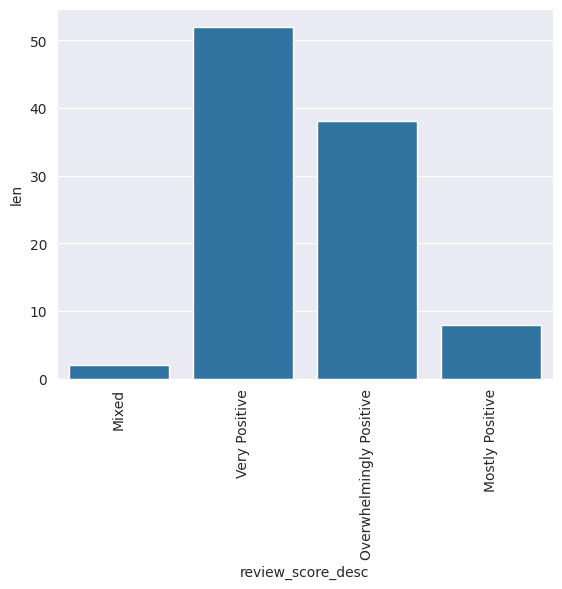

In [33]:
count_plot = popular_games.group_by("review_score_desc").agg(pl.len())
sns.barplot(count_plot, x="review_score_desc", y="len")
plt.xticks(rotation=90)
plt.show()

In [34]:
reviews_from_popular_games = reviews.join(popular_games, on="appid").select(
    "rec_id",
    "author_id",
    "appid",
    "name",
    pl.all().exclude(["rec_id", "author_id", "appid", "name"])
)
reviews_from_popular_games = reviews_from_popular_games.with_columns(
    review_date=pl.from_epoch(pl.col("timestamp_created"), time_unit="s")
)
reviews_from_popular_games

rec_id,author_id,appid,name,playtime_forever,playtime_last_two_weeks,playtime_at_review,num_games_owned,num_reviews,last_played,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,primarily_steam_deck,total_playtime,total_positive_reviews,total_negative_reviews,votes_ratio,weighted_votes,last_review,total_reviews,steam_purchases,free_purchases,early_access_reviews,type,required_age,is_free,minimum_pc_requirements,recommended_pc_requirements,controller_support,detailed_description,about_the_game,short_description,supported_languages,header_image,developers,publishers,price,category_ids,genres_list,windows_support,mac_support,linux_support,release_date,coming_soon,recommendations,dlc,review_score,review_score_desc,total_positive_reviews_right,total_negative_reviews_right,total_reviews_right,review_date
i64,i64,i64,str,i64,i64,i64,i64,i64,i64,str,str,i64,i64,bool,i64,i64,f64,i64,bool,bool,bool,bool,i64,u32,u32,f64,f64,i64,u32,u32,u32,u32,str,i64,bool,str,str,str,str,str,str,list[str],str,list[str],list[str],f64,list[i64],list[str],bool,bool,bool,str,bool,i64,list[i64],i64,str,i64,i64,i64,datetime[μs]
195196293,76561198421348622,420290,"""Blackwake""",154,null,152,null,30,1747879200,"""english""","""I PAYED MONEY FOR THIS GAME""",1747632245,1747632245,true,2,3,0.542857,0,true,false,false,false,28433606,8956,1754,0.836228,0.847256,1747632245,10710,10710,117,5810,"""game""",0,true,"""Minimum:OS *: Windows 7 64-bit…","""Recommended:OS *: Windows 7 64…",null,"""<strong>Blackwake is a multipl…","""<strong>Blackwake is a multipl…","""Blackwake is a multiplayer nav…","[""English""]","""https://shared.akamai.steamsta…","[""Mastfire Studios Pty Ltd""]","[""Mastfire Studios Pty Ltd""]",null,"[1, 49, … 42]","[""Action"", ""Casual"", … ""Free To Play""]",true,true,false,"""19 Feb, 2020""",false,20831,[594184],8,"""Very Positive""",8956,1754,10710,2025-05-19 05:24:05
194452761,76561198330211579,420290,"""Blackwake""",2633,null,2352,391,11,1746995871,"""english""","""i decided to make a review say…",1746680380,1746680380,true,8,0,0.616962,0,true,false,false,false,28433606,8956,1754,0.836228,0.847256,1747632245,10710,10710,117,5810,"""game""",0,true,"""Minimum:OS *: Windows 7 64-bit…","""Recommended:OS *: Windows 7 64…",null,"""<strong>Blackwake is a multipl…","""<strong>Blackwake is a multipl…","""Blackwake is a multiplayer nav…","[""English""]","""https://shared.akamai.steamsta…","[""Mastfire Studios Pty Ltd""]","[""Mastfire Studios Pty Ltd""]",null,"[1, 49, … 42]","[""Action"", ""Casual"", … ""Free To Play""]",true,true,false,"""19 Feb, 2020""",false,20831,[594184],8,"""Very Positive""",8956,1754,10710,2025-05-08 04:59:40
194313880,76561198288533480,420290,"""Blackwake""",1539,null,1539,null,2,1721667481,"""english""","""Very good old game, heres a li…",1746479773,1746479773,true,0,0,0.5,0,true,false,false,false,28433606,8956,1754,0.836228,0.847256,1747632245,10710,10710,117,5810,"""game""",0,true,"""Minimum:OS *: Windows 7 64-bit…","""Recommended:OS *: Windows 7 64…",null,"""<strong>Blackwake is a multipl…","""<strong>Blackwake is a multipl…","""Blackwake is a multiplayer nav…","[""English""]","""https://shared.akamai.steamsta…","[""Mastfire Studios Pty Ltd""]","[""Mastfire Studios Pty Ltd""]",null,"[1, 49, … 42]","[""Action"", ""Casual"", … ""Free To Play""]",true,true,false,"""19 Feb, 2020""",false,20831,[594184],8,"""Very Positive""",8956,1754,10710,2025-05-05 21:16:13
194181840,76561198866099512,420290,"""Blackwake""",405,null,385,247,61,1746417795,"""english""","""i played this game back when i…",1746333384,1746333384,true,0,0,0.5,0,true,false,false,false,28433606,8956,1754,0.836228,0.847256,1747632245,10710,10710,117,5810,"""game""",0,true,"""Minimum:OS *: Windows 7 64-bit…","""Recommended:OS *: Windows 7 64…",null,"""<strong>Blackwake is a multipl…","""<strong>Blackwake is a multipl…","""Blackwake is a multiplay

In [35]:
timestamps = pl.from_epoch(reviews_from_popular_games["timestamp_created"], time_unit="s")
timestamps

timestamp_created
datetime[μs]
2025-05-19 05:24:05
2025-05-08 04:59:40
2025-05-05 21:16:13
2025-05-04 04:36:24
2025-05-02 13:56:15
…
2021-01-28 18:32:25
2021-01-28 18:08:51
2021-01-28 17:50:50


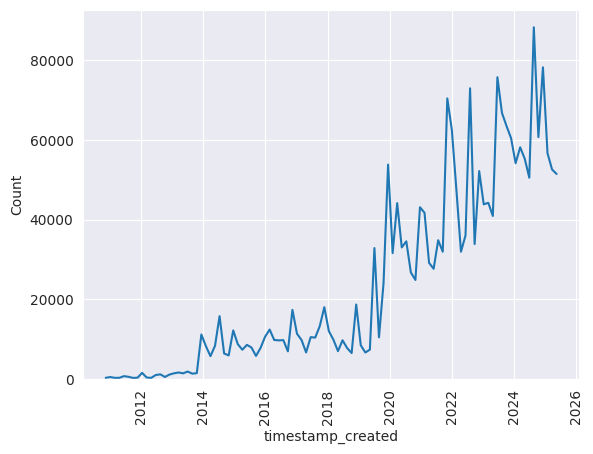

In [36]:
sns.histplot(x=timestamps, bins=100, element="poly", fill=False)
plt.xticks(rotation=90)
plt.show()

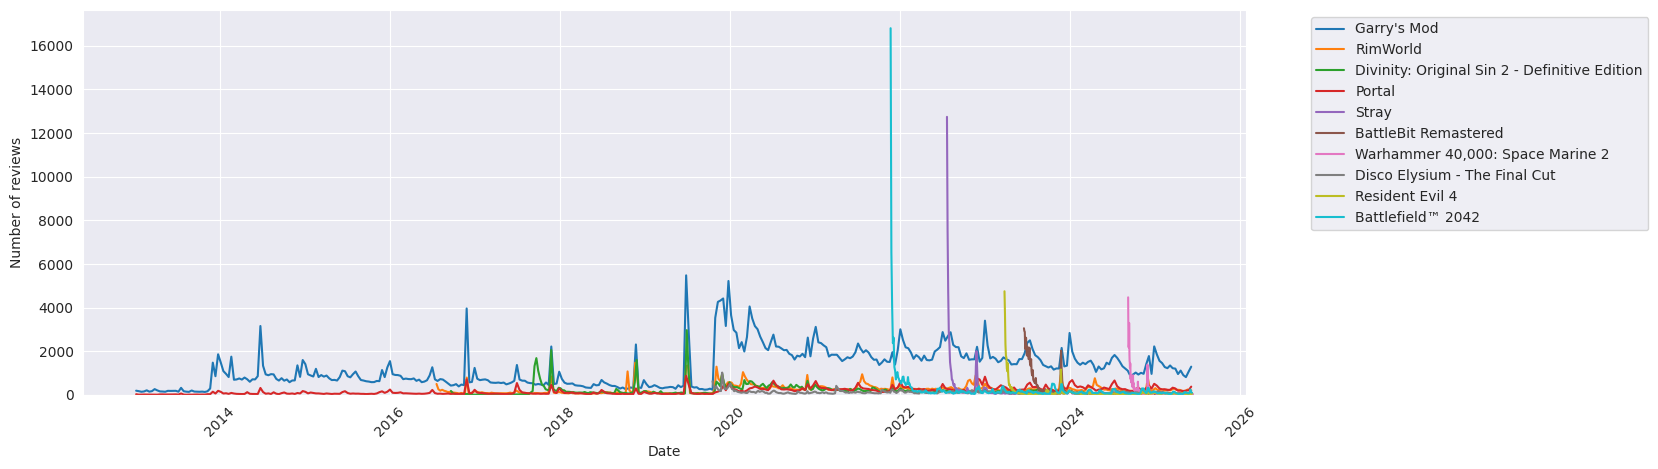

In [37]:
game_ids = popular_games["appid"].head(10).to_list()

plt.figure(figsize=(15, 5))
for game_id in game_ids:
    game_data = reviews_from_popular_games.filter(pl.col("appid") == game_id)
    game_name = game_data["name"].unique()[0]
    timestamps = pl.from_epoch(game_data["timestamp_created"], time_unit="s")
    timestamps = timestamps.filter((timestamps.dt.year() > 2012) & (timestamps.dt.year() <= 2025))
    sns.histplot(x=timestamps, bins=400, element="poly", fill=False, label=game_name)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Number of reviews")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Rolling window for game scores at a given time

In [38]:
weighted_reviews = reviews_from_popular_games.sort(["name", "timestamp_created"]).with_columns([
    (pl.col("voted_up") * pl.col("weighted_vote_score")).alias("weighted_votes"),
    (pl.col("voted_up") * pl.col("weighted_vote_score")).cum_sum().over("appid").alias("cum_weighted_votes"),
    pl.col("weighted_vote_score").cum_sum().over("appid").alias("cum_weights")
]).with_columns([
    (pl.col("cum_weighted_votes") / pl.col("cum_weights")).alias("weighted_score")
])

In [39]:
weighted_reviews.select([
    'appid',
    'name',
    'timestamp_created',
    'voted_up',
    'weighted_vote_score',
    'weighted_votes',
    'cum_weighted_votes',
    'cum_weights',
    'weighted_score'
]).sort(['appid', 'timestamp_created'])


appid,name,timestamp_created,voted_up,weighted_vote_score,weighted_votes,cum_weighted_votes,cum_weights,weighted_score
i64,str,i64,bool,f64,f64,f64,f64,f64
400,"""Portal""",1287250210,true,0.5,0.5,0.5,0.5,1.0
400,"""Portal""",1287544916,true,0.5,0.5,1.0,1.0,1.0
400,"""Portal""",1287659602,true,0.5,0.5,1.5,1.5,1.0
400,"""Portal""",1287787500,true,0.5,0.5,2.0,2.0,1.0
400,"""Portal""",1290187757,true,0.5,0.5,2.5,2.5,1.0
…,…,…,…,…,…,…,…,…
2670630,"""Supermarket Simulator""",1749247753,true,0.5,0.5,13158.41677,13908.681986,0.946058
2670630,"""Supermarket Simulator""",1749253466,false,0.538024,0.0,13158.41677,13909.22001,0.946021
2670630,"""Supermarket Simulator""",1749253614,true,0.5,0.5,13158.91677,13909.72001,0.946023


### Explore genres and categories

In [40]:
games_data_full

appid,name,type,required_age,is_free,minimum_pc_requirements,recommended_pc_requirements,controller_support,detailed_description,about_the_game,short_description,supported_languages,header_image,developers,publishers,price,category_ids,genres_list,windows_support,mac_support,linux_support,release_date,coming_soon,recommendations,dlc,review_score,review_score_desc,total_positive_reviews,total_negative_reviews,total_reviews
i64,str,str,i64,bool,str,str,str,str,str,str,list[str],str,list[str],list[str],f64,list[i64],list[str],bool,bool,bool,str,bool,i64,list[i64],i64,str,i64,i64,i64
2852260,"""Pandarunium""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<strong>Pandarunium</strong> i…","""<strong>Pandarunium</strong> i…","""Team up with friends in this t…","[""English""]","""https://shared.akamai.steamsta…","[""Tenax Studios""]","[""Tenax Studios""]",3.99,"[2, 1, … 62]","[""Casual"", ""Indie""]",true,false,false,"""20 Jun, 2024""",false,null,[],0,"""2 user reviews""",2,0,2
291550,"""Brawlhalla""","""game""",0,true,"""Minimum:Memory: 2 GB RAMStorag…","""Recommended:Memory: 4 GB RAMNe…",null,"""<img class=""bb_img"" src=""https…","""<img class=""bb_img"" src=""https…","""An epic platform fighter for u…","[""English"", ""French"", … ""Turkish""]","""https://shared.akamai.steamsta…","[""Blue Mammoth Games""]","[""Ubisoft""]",null,"[2, 1, … 44]","[""Action"", ""Indie"", ""Free To Play""]",true,true,false,"""17 Oct, 2017""",false,2890,"[298641, 2974360, … 3392630]",8,"""Very Positive""",1306,266,1572
2116250,"""Draft Day Sports: College Foot…","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""Prepare to lead your favorite …","""Prepare to lead your favorite …","""Draft Day Sports: College Foot…","[""English""]","""https://shared.akamai.steamsta…","[""Wolverine Studios""]","[""Wolverine Studios""]",53.0,"[2, 62]","[""Indie"", ""Simulation"", … ""Strategy""]",true,false,false,"""31 Aug, 2022""",false,null,[],5,"""Mixed""",9,6,15
946610,"""Pocket Rogues""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …","""full""","""<p class=""bb_paragraph""><stron…","""<p class=""bb_paragraph""><stron…","""Pocket Rogues is a dynamic 2D-…","[""English"", ""Russian"", … ""Portuguese - Brazil""]","""https://shared.akamai.steamsta…","[""EtherGaming""]","[""EtherGaming""]",23.0,"[2, 1, … 62]","[""Action"", ""Adventure"", … ""Early Access""]",true,false,false,"""25 Oct, 2018""",false,453,[],8,"""Very Positive""",95,21,116
3725490,"""JackKnife""","""game""",0,false,"""Minimum:OS: Windows 10 64-bitP…","""Recommended:OS: Windows 10 or …",null,"""<p class=""bb_paragraph"">Carver…","""<p class=""bb_paragraph"">Carver…","""First Person Shooter with surr…","[""English""]","""https://shared.akamai.steamsta…","[""SlavJankStudios""]","[""SlavJankStudios""]",null,"[2, 62]","[""Action""]",true,false,false,"""July 2025""",true,null,[],0,"""No reviews""",0,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2894880,"""Misfits""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …","""full""","""Misfits is a cooperative puzzl…","""Misfits is a cooperative puzzl…","""Misfits is a cooperative puzzl…","[""English""]","""https://shared.akamai.steamsta…","[""Tiny Ox""]","[""Tiny Ox""]",null,"[2, 1, … 62]","[""Casual""]",true,true,false,"""To be announced""",true,null,[],0,"""No reviews""",0,0,0
2429930,"""Power Network Tycoon""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<p class=""bb_paragraph"">Power …","""<p class=""bb_paragraph"">Power …","""Power Network Tycoon is a powe…","[""English"", ""French"", … ""Simplified Chinese""]","""https://shared.akamai.steamsta…","[""David Made This""]","[""David Made This""]",33.5,"[2, 22, … 62]","[""Indie"", ""Simulation"", … ""Early Access""]",true,true,true,"""12 Feb, 2024""",false,null,[],7,

In [58]:
categories_info = pl.read_parquet("../data/raw/categories.parquet")
categories_info

categoryid,category
i64,str
2,"""Single-player"""
1,"""Multi-player"""
20,"""MMO"""
50,"""High-Quality Audio"""
49,"""PvP"""
…,…
44,"""Remote Play Together"""
61,"""HDR"""
62,"""Family Sharing"""


In [59]:
games_data_full_exploded = games_data_full.explode("category_ids").rename({"category_ids": "categoryid"})
games_data_w_cats = games_data_full_exploded.join(categories_info, on="categoryid").drop("categoryid")
games_data_clean = games_data_w_cats.group_by(pl.all().exclude("category")).agg(pl.col("category").implode().alias("categories"))

In [43]:
platforms_sup = games_data_clean.select("windows_support", "mac_support", "linux_support").sum()

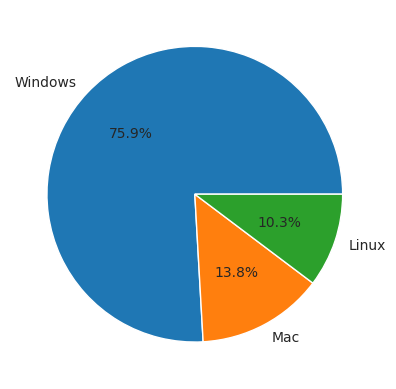

In [44]:
plt.pie(platforms_sup.to_numpy()[0], labels=["Windows", "Mac", "Linux"], autopct="%1.1f%%")
plt.show()

In [45]:
categories_count = games_data_w_cats.group_by("category").agg(pl.len().alias("count"))
categories_count.sort("count")

category,count
str,u32
"""Mods""",2
"""Mods (requires HL2)""",2
"""SteamVR Collectibles""",36
"""Includes Source SDK""",83
"""VAC Enabled""",106
…,…
"""Steam Cloud""",24106
"""Full Controller Support""",25334
"""Steam Achievements""",46419


In [46]:
genres_count = games_data_full.explode("genres_list").group_by("genres_list").agg(pl.len().alias("count")).rename({"genres_list": "genre"})
genres_count.sort("count")

genre,count
str,u32
"""Episodic""",1
"""360 Video""",1
"""Tutorial""",1
"""Documentary""",1
"""Short""",1
…,…
"""Simulation""",21582
"""Casual""",41529
"""Adventure""",41863


In [47]:
num_dlcs = games_data_clean.with_columns([pl.col("dlc").list.len().alias("num_dlcs")])
num_dlcs_count = num_dlcs.group_by("num_dlcs").agg(pl.len().alias("count")).sort("num_dlcs", descending=True)
num_dlcs["num_dlcs"].hist(bin_count=1000)

breakpoint,category,count
f64,cat,u32
3.524,"""[0.0, 3.524]""",99569
7.048,"""(3.524, 7.048]""",991
10.572,"""(7.048, 10.572]""",251
14.096,"""(10.572, 14.096]""",138
17.62,"""(14.096, 17.62]""",70
…,…,…
3509.904,"""(3506.38, 3509.904]""",0
3513.428,"""(3509.904, 3513.428]""",0
3516.952,"""(3513.428, 3516.952]""",0


In [48]:
num_dlcs.filter(pl.col("num_dlcs") > 100).explode("genres_list").group_by("genres_list").agg(pl.len()).sort("len", descending=True)

genres_list,len
str,u32
"""Simulation""",10
"""RPG""",6
"""Action""",5
"""Strategy""",4
"""Indie""",4
…,…
"""Education""",3
"""Casual""",3
"""Web Publishing""",3


In [49]:
num_dlcs.filter(pl.col("num_dlcs") > 100).explode("categories").group_by("categories").agg(pl.len()).sort("len", descending=True)


categories,len
str,u32
"""Single-player""",17
"""Family Sharing""",15
"""Steam Achievements""",13
"""Steam Trading Cards""",12
"""Steam Cloud""",11
…,…
"""VR Only""",1
"""Remote Play on Phone""",1
"""Remote Play on TV""",1


In [53]:
steam_games = pl.read_parquet("../data/raw/games/steam_games.parquet")
steam_games

appid,name,type,required_age,is_free,minimum_pc_requirements,recommended_pc_requirements,controller_support,detailed_description,about_the_game,short_description,supported_languages,header_image,developers,publishers,price,category_ids,genres_list,windows_support,mac_support,linux_support,release_date,coming_soon,recommendations,dlc
i64,str,str,i64,bool,str,str,str,str,str,str,list[str],str,list[str],list[str],f64,list[i64],list[str],bool,bool,bool,str,bool,i64,list[i64]
2852260,"""Pandarunium""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<strong>Pandarunium</strong> i…","""<strong>Pandarunium</strong> i…","""Team up with friends in this t…","[""English""]","""https://shared.akamai.steamsta…","[""Tenax Studios""]","[""Tenax Studios""]",3.99,"[2, 1, … 62]","[""Casual"", ""Indie""]",true,false,false,"""20 Jun, 2024""",false,null,[]
1226222,"""Killer Gin Cats and Dogs DLC""","""dlc""",0,true,"""Minimum:OS *: Windows 7/8/8.1/…",null,"""full""","""This DLC package allows you to…","""This DLC package allows you to…","""This DLC package allows you to…","[""English""]","""https://shared.akamai.steamsta…","[""The Killer Gin""]",[],null,"[2, 21, … 62]","[""RPG""]",true,true,true,"""12 Mar, 2020""",false,null,[]
291550,"""Brawlhalla""","""game""",0,true,"""Minimum:Memory: 2 GB RAMStorag…","""Recommended:Memory: 4 GB RAMNe…",null,"""<img class=""bb_img"" src=""https…","""<img class=""bb_img"" src=""https…","""An epic platform fighter for u…","[""English"", ""French"", … ""Turkish""]","""https://shared.akamai.steamsta…","[""Blue Mammoth Games""]","[""Ubisoft""]",null,"[2, 1, … 44]","[""Action"", ""Indie"", ""Free To Play""]",true,true,false,"""17 Oct, 2017""",false,2890,"[298641, 2974360, … 3392630]"
2116250,"""Draft Day Sports: College Foot…","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""Prepare to lead your favorite …","""Prepare to lead your favorite …","""Draft Day Sports: College Foot…","[""English""]","""https://shared.akamai.steamsta…","[""Wolverine Studios""]","[""Wolverine Studios""]",53.0,"[2, 62]","[""Indie"", ""Simulation"", … ""Strategy""]",true,false,false,"""31 Aug, 2022""",false,null,[]
946610,"""Pocket Rogues""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …","""full""","""<p class=""bb_paragraph""><stron…","""<p class=""bb_paragraph""><stron…","""Pocket Rogues is a dynamic 2D-…","[""English"", ""Russian"", … ""Portuguese - Brazil""]","""https://shared.akamai.steamsta…","[""EtherGaming""]","[""EtherGaming""]",23.0,"[2, 1, … 62]","[""Action"", ""Adventure"", … ""Early Access""]",true,false,false,"""25 Oct, 2018""",false,453,[]
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2894880,"""Misfits""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …","""full""","""Misfits is a cooperative puzzl…","""Misfits is a cooperative puzzl…","""Misfits is a cooperative puzzl…","[""English""]","""https://shared.akamai.steamsta…","[""Tiny Ox""]","[""Tiny Ox""]",null,"[2, 1, … 62]","[""Casual""]",true,true,false,"""To be announced""",true,null,[]
2429930,"""Power Network Tycoon""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<p class=""bb_paragraph"">Power …","""<p class=""bb_paragraph"">Power …","""Power Network Tycoon is a powe…","[""English"", ""French"", … ""Simplified Chinese""]","""https://shared.akamai.steamsta…","[""David Made This""]","[""David Made This""]",33.5,"[2, 22, … 62]","[""Indie"", ""Simulation"", … ""Early Access""]",true,true,true,"""12 Feb, 2024""",false,null,[]
418670,"""Pankapu""","""game""",0,false,"""Minimum:OS: Vista or higherPro…",null,"""full""","""<h1>More from us</h1><p><img c…","""Jump into a neo-retro adventur…","""Pankapu is a narrative action-…","[""English"", ""French"", … ""Japanese""]","""https://shared.akamai.steamsta…","[""Too Kind Studio""]","[""Dear Village

In [54]:
steam_games_extra_feat = pl.read_parquet("../data/raw/games/steam_games_extra_features.parquet")
steam_games_extra_feat

appid,review_score,review_score_desc,total_positive_reviews,total_negative_reviews,total_reviews
i64,i64,str,i64,i64,i64
2852260,0,"""2 user reviews""",2,0,2
291550,8,"""Very Positive""",1306,266,1572
2116250,5,"""Mixed""",9,6,15
946610,8,"""Very Positive""",95,21,116
390730,8,"""Very Positive""",144,15,159
…,…,…,…,…,…
2576250,6,"""Mostly Positive""",10,3,13
3535330,0,"""1 user reviews""",0,1,1
210896,5,"""Mixed""",7,6,13
